In [1]:
import numpy as np
import sys
sys.path.append('/home/cayjobla/Desktop/Research/delay-optimizer')
from DelayEffects.Analyzer import Analyzer
import os
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Initialize
loss_name = 'Zakharov'
zak2d = Analyzer(2, loss_name)
zak10d = Analyzer(10, loss_name)
zak100d = Analyzer(100, loss_name)
zak1000d = Analyzer(1000, loss_name)

In [3]:
# Read params
params = pd.read_csv("../hyperparameter_data.csv")

## Helper Functions

In [4]:
def parse(args):
    new_params = params.copy()
    for arg, val in args.items():
        new_params = new_params[new_params[arg] == val]
        
    return new_params

def validate(analyzer, args, num_params=5, num_points=200, drop_cols=None, verbose=False):
    # Initialize
    if drop_cols is None:
        drop_cols = ["loss_name", "dim", "use_delays", "max_L", "constant_learning_rate", "learning_rate", 
                 "min_val", "max_val", "num_delays", "maxiter", "optimizer_name", "tol", "max_evals",
                 "symmetric_delays", "num_tests", "print_log", "vary_percent", "hyper_minimize", "clip_grad",
                 "clip_val", "num_test_initials", "test_time", "num_initial_values"]
    delayed = args['use_delays']
    
    # Parse hyperparameters
    parsed = parse(args)
    parsed = parsed.drop(columns=drop_cols)
    parsed = parsed.sort_values('best_loss')
    
    # Extract params
    vals = parsed.loc[:,['max_learning_rate', 'min_learning_rate', 'step_size']].values
    if len(vals) > num_params:
        vals = vals[:num_params]
    
    # Add control params
    vals = np.vstack(([[2.98, 0.23, 740.]], vals))
    
    analyzer.initialize_points(num_points, 'random')
    mean_losses = []
    for i, params in enumerate(vals):
        if delayed is True:
            analyzer.del_params = {'max_learning_rate': params[0], 'min_learning_rate': params[1], 
                                   'step_size': params[2]}
        else:
            analyzer.params = {'max_learning_rate': params[0], 'min_learning_rate': params[1], 
                                   'step_size': params[2]}
        analyzer.calculate_save_values(delayed)
        
        if delayed is True:
            conv = analyzer.del_conv
        else:
            conv = analyzer.conv
            
        mean_losses.append(np.mean(analyzer.extract_values(delayed, 'loss')[1]))
        
    return vals, mean_losses
            
            
def results(vals, mean_losses): 
    i = np.argmin(mean_losses)
    best_params = np.round(vals[i], 2)
    worst = np.argwhere(mean_losses > mean_losses[0]).ravel()
    
    return float("%.3g" % mean_losses[i]), best_params, i, worst
        
def plot_val(mean_losses):
    ind = np.arange(len(mean_losses))
    ticks = [i for i in ind]
    ticks[0] = "Control"
    plt.bar(ind, mean_losses, tick_label=ticks, color='C2')
    plt.ylabel("Mean Loss")
    plt.show()
    
def drop_params(loss_name, max_learning_rate, min_learning_rate, step_size):
    new_params = params.copy()
    new_params = new_params[new_params["loss_name"]==loss_name]
    new_params = new_params[new_params["max_learning_rate"]==max_learning_rate]
    new_params = new_params[new_params["min_learning_rate"]==min_learning_rate]
    new_params = new_params[new_params["step_size"]==step_size]
    if len(new_params.index) > 0:
        index = new_params.index[0]
        return params.drop(index)
    else:
        return params

# Undelayed

In [5]:
# Initialize
num_tests = 5
num_points = 500
num_params = 8

In [6]:
# 2d undelayed
args = {"loss_name":'Zakharov', "dim":2, "use_delays":False, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak2d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [2.11e-07, 1.89e-07, 1.84e-07, 2.4e-07, 2.08e-07]
Best Params Indices: {6: 2, 4: 1, 3: 2}
Worse than Control: {7: 3, 2: 1, 3: 1, 8: 2, 1: 1, 6: 1}


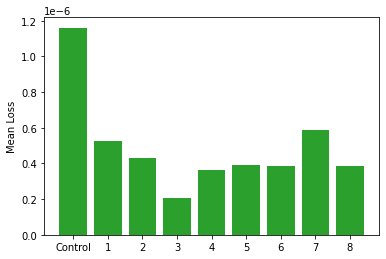

In [7]:
plot_val(mean_losses)

In [9]:
print(vals[6])
print(vals[4])
print(vals[3])

[2.79292934e+00 7.08893596e-01 9.50000000e+02]
[3.27078764e+00 6.78457773e-01 1.37500000e+03]
[3.46244939e+00 6.49080919e-01 1.15000000e+03]


In [79]:
# OLD - dropped 1,2,7,8
params = drop_params('Zakharov', vals[1][0], vals[1][1], vals[1][2])
params = drop_params('Zakharov', vals[2][0], vals[1][1], vals[1][2])
params = drop_params('Zakharov', vals[7][0], vals[1][1], vals[1][2])
params = drop_params('Zakharov', vals[8][0], vals[1][1], vals[1][2])

In [6]:
# 10d undelayed
args = {"loss_name":'Zakharov', "dim":10, "use_delays":False, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak10d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [112.0, 111.0, 126.0, 112.0, 107.0]
Best Params Indices: {6: 5}
Worse than Control: {5: 1}


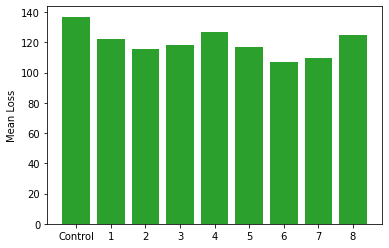

In [7]:
plot_val(mean_losses)

In [7]:
print(vals[6])

[3.28731442e+00 7.99542299e-01 1.47500000e+03]


In [ ]:
# No params dropped for 10d

In [10]:
# 100d undelayed
args = {"loss_name":'Zakharov', "dim":100, "use_delays":False, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak100d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [240000.0, 390000.0, 357000.0, 374000.0, 139000.0]
Best Params Indices: {2: 2, 7: 2, 4: 1}
Worse than Control: {6: 4, 1: 3, 2: 3, 3: 3, 4: 2, 5: 3, 8: 3}


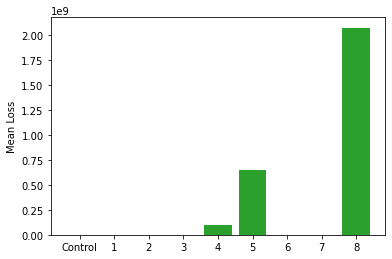

In [11]:
plot_val(mean_losses)

In [12]:
print(vals[2])
print(vals[7])
print(vals[4])

[  2.43413255   0.54351886 200.        ]
[  2.65366164   0.50533453 100.        ]
[2.93457642e+00 5.83959959e-01 6.00000000e+02]


In [9]:
params = drop_params('Zakharov', vals[1][0], vals[1][1], vals[1][2])
params = drop_params('Zakharov', vals[6][0], vals[6][1], vals[6][2])
params = drop_params('Zakharov', vals[8][0], vals[8][1], vals[8][2])

In [11]:
# 1000d undelayed
args = {"loss_name":'Zakharov', "dim":1000, "use_delays":False, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(8):
    vals, mean_losses = validate(zak1000d, args, 10, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [148000000000.0, 77200000000.0, 55300000000.0, 875000000000.0, 701000000000.0, 112000000000.0, 529000000000.0, 83400000000.0]
Best Params Indices: {1: 4, 2: 2, 10: 1, 3: 1}
Worse than Control: {3: 5, 5: 5, 6: 7, 8: 2, 9: 5, 10: 5, 2: 2, 4: 3, 7: 4, 1: 3}


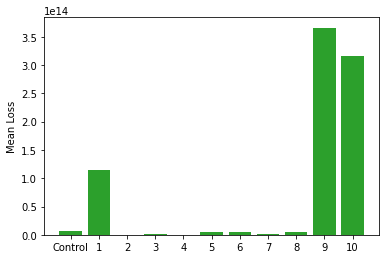

In [12]:
plot_val(mean_losses)

In [13]:
print(vals[1])

[2.06909896e+00 2.11331257e-02 7.00000000e+02]


In [10]:
for i in [1,3,6,8,9,10]:
    params = drop_params('Zakharov', vals[i][0], vals[i][1], vals[i][2])

# Max Delay of 1

In [16]:
# 2d max_L=1
args = {"loss_name":'Zakharov', "dim":2, "use_delays":True, "max_L":1, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak2d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [0.063, 0.0324, 0.0458, 0.0257, 0.073]
Best Params Indices: {3: 1, 6: 4}
Worse than Control: {1: 2, 2: 1, 4: 4, 5: 5, 7: 5}


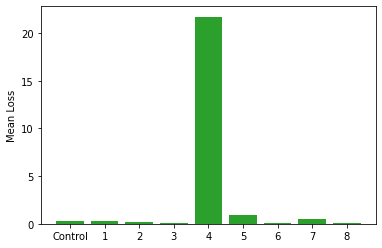

In [17]:
plot_val(mean_losses)

In [18]:
print(vals[6])
print(vals[1])

[3.38847564e+00 8.55564855e-01 1.30000000e+03]
[3.46165524e+00 3.64139211e-01 8.00000000e+02]


In [19]:
params = drop_params('Zakharov', vals[4][0], vals[4][1], vals[4][2])
params = drop_params('Zakharov', vals[5][0], vals[5][1], vals[5][2])
params = drop_params('Zakharov', vals[7][0], vals[7][1], vals[7][2])

In [20]:
# 10d max_L=1
args = {"loss_name":'Zakharov', "dim":10, "use_delays":True, "max_L":1, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak10d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [114.0, 117.0, 107.0, 127.0, 117.0]
Best Params Indices: {4: 5}
Worse than Control: {6: 3, 2: 1, 3: 1}


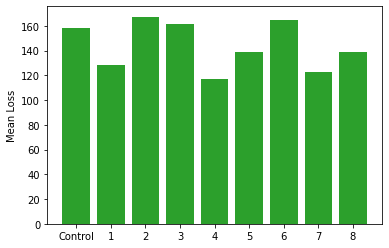

In [21]:
plot_val(mean_losses)

In [22]:
print(vals[4])

[3.57336669e+00 7.32893514e-01 2.10000000e+03]


In [ ]:
params = drop_params('Zakharov', vals[6][0], vals[6][1], vals[6][2])

In [6]:
# 100d max_L=1
args = {"loss_name":'Zakharov', "dim":100, "use_delays":True, "max_L":1, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(num_tests):
    vals, mean_losses = validate(zak100d, args, num_params, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [6180.0, 5260.0, 6370.0, 4940.0, 6160.0]
Best Params Indices: {6: 2, 2: 1, 3: 2}
Worse than Control: {8: 4, 1: 1, 4: 1}


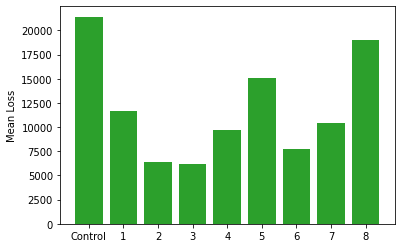

In [7]:
plot_val(mean_losses)

In [8]:
print(vals[6])
print(vals[2])
print(vals[3])

[2.18112402e+00 8.67169974e-01 1.30000000e+03]
[3.21448928e+00 6.55752853e-01 1.70000000e+03]
[3.84409373e+00 3.45768504e-01 2.10000000e+03]


In [ ]:
params = drop_params('Zakharov', vals[8][0], vals[8][1], vals[8][2])

In [11]:
# 1000d max_L=1
args = {"loss_name":'Zakharov', "dim":1000, "use_delays":True, "max_L":1, "constant_learning_rate":False}

good_ind = []
bad_ind = []
best_losses = []

for j in range(5):
    vals, mean_losses = validate(zak1000d, args, 15, num_points)
    best_loss, best_params, i, worse_ind = results(vals, mean_losses)
    bad_ind = bad_ind + list(worse_ind)
    good_ind.append(i)
    best_losses.append(best_loss)
    
print("Best Losses:", best_losses)
print("Best Params Indices:", {ind:good_ind.count(ind) for ind in good_ind})
print("Worse than Control:", {ind:bad_ind.count(ind) for ind in bad_ind})

Best Losses: [881000000.0, 683000000.0, 945000000.0, 1490000000.0, 1060000000.0]
Best Params Indices: {4: 3, 0: 2}
Worse than Control: {1: 5, 2: 5, 3: 5, 4: 2}


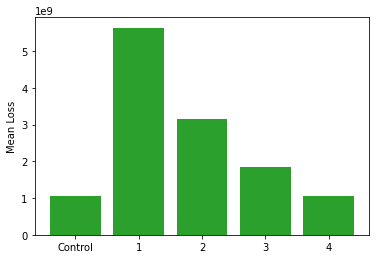

In [12]:
plot_val(mean_losses)

In [13]:
print(vals[4])
print(vals[0])

[2.70602948e+00 3.46671869e-01 1.00000000e+03]
[2.98e+00 2.30e-01 7.40e+02]


In [10]:
# Control won, had to drop values
for i in [3,4,5,6,7,8]:
    params = drop_params('Zakharov', vals[i][0], vals[i][1], vals[i][2])

In [ ]:
np.array([
    ['Zakharov', 2, False, 2.7929, 0.7089, 950.0],        # SUBFINAL
    ['Zakharov', 10, False, 0, 3.2873, 0.7995, 1475.0],   # SUBFINAL
    ['Zakharov', 100, False, 0, 2.4341, 0.5435, 200],     # [2.6537, 0.5053, 100.0], [2.9346, 0.5840, 600]
    ['Zakharov', 1000, False, 0, ],  # REROLL
    ['Zakharov', 2, True, 1, 3.3885, 0.8556, 1300.0],     # SUBFINAL
    ['Zakharov', 10, True, 1, 3.5734, 0.7329, 2100.0],    # SUBFINAL
    ['Zakharov', 100, True, 1, 3.8441, 0.3458, 2100.0],   # [2.1811, 0.8672, 1300.0]
    ['Zakharov', 1000, True, 1, 2.706, 0.3467, 1000.0]    # SUBFINAL
])